In [33]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


#data frame 

df = pd.read_csv(r"C:\Users\ajhgs\Downloads\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
#cleaning the data :
#1- missing data ?

for col in df.columns:
    md_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col , md_pct))

    
#looking at the missing data 
df.isnull()


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [35]:
#check the data type 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [38]:
#change data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['score'] = df['runtime'].astype('int64')
df['votes'] = df['runtime'].astype('int64')

In [36]:
#looking at the missing data 
df.isnull()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [37]:
#replace the null with 0
df = df.fillna('')
df = df.replace('' ,0 )
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,0,120.0


In [39]:
 #correct the year column 
df['tmp'] = df['released'].astype(str).str.split(',').str[1]
 

In [40]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",146,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",104,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",124,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",88,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",98,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980 (United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",90,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020 (United States)
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",90,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020 (United States)
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",0,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020 (Cameroon)
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",120,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020 (United States)


In [41]:
df['correct_year'] = df['tmp'].astype(str).str[:5]

In [42]:
df = df.drop(columns = 'year')
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",146,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",104,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",124,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980 (United States),1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",88,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980 (United States),1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",98,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980 (United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,"October 23, 2020 (United States)",90,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020 (United States),2020
7664,Dream Round,0,Comedy,"February 7, 2020 (United States)",90,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020 (United States),2020
7665,Saving Mbango,0,Drama,"April 27, 2020 (Cameroon)",0,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020 (Cameroon),2020
7666,It's Just Us,0,Drama,"October 1, 2020 (United States)",120,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020 (United States),2020


In [43]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",146,146,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",104,104,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980 (United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",124,124,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980 (United States),1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",88,88,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980 (United States),1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",98,98,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980 (United States),1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,"October 23, 2020 (United States)",90,90,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90,2020 (United States),2020
7664,Dream Round,0,Comedy,"February 7, 2020 (United States)",90,90,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020 (United States),2020
7665,Saving Mbango,0,Drama,"April 27, 2020 (Cameroon)",0,0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020 (Cameroon),2020
7666,It's Just Us,0,Drama,"October 1, 2020 (United States)",120,120,James Randall,James Randall,Christina Roz,United States,15000,0,0,120,2020 (United States),2020


In [44]:
df = df.sort_values(by = ['gross'] , inplace = False , ascending = False)

In [14]:
#drop the duplicates

df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",162,162,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",181,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019 (United States),2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",194,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",138,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",149,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018 (United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,"January 26, 1990 (United States)",92,92,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990 (United States),1990
1614,Edge of Sanity,R,Horror,"April 14, 1989 (United States)",85,85,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989 (United States),1989
1606,"I, Madman",R,Fantasy,"April 7, 1989 (United States)",89,89,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989 (United States),1989
1601,My Twentieth Century,0,Comedy,"January 13, 1990 (Japan)",104,104,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990 (Japan),1990


In [15]:
#start looking for Correlation with gross
#budget high Correlation
#company high Correlation


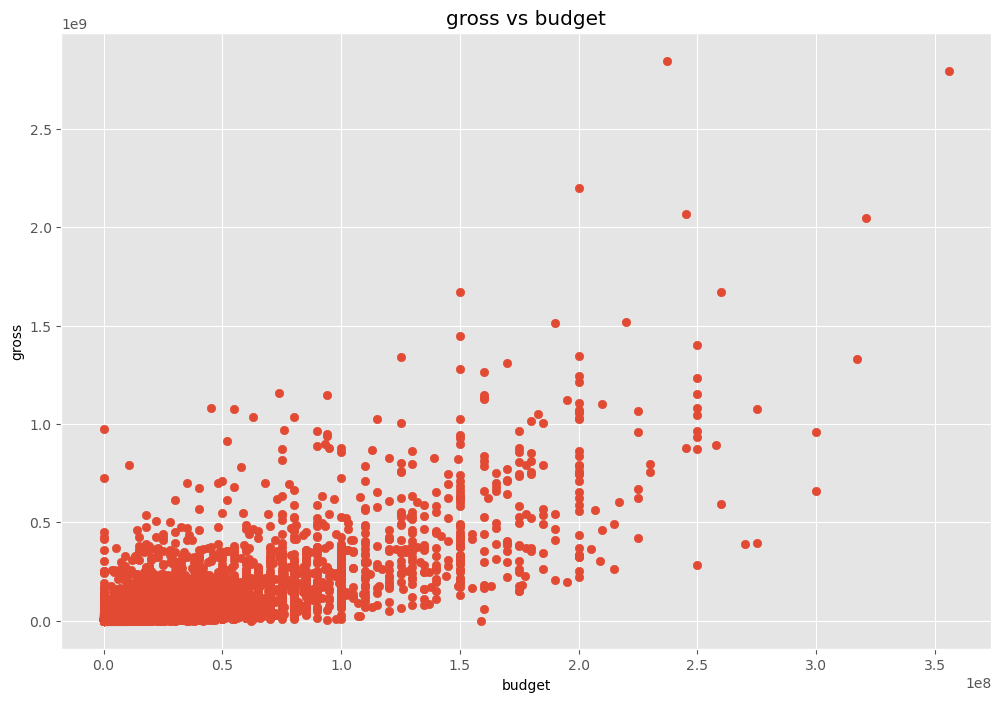

In [16]:
#scatter plot with gross vs budget

plt.scatter(x = df['budget'] , y = df['gross'])

plt.title('gross vs budget')

plt.xlabel('budget')

plt.ylabel('gross')

plt.show()

In [17]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",162,162,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",181,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019 (United States),2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",194,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",138,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",149,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018 (United States),2018


<Axes: xlabel='budget', ylabel='gross'>

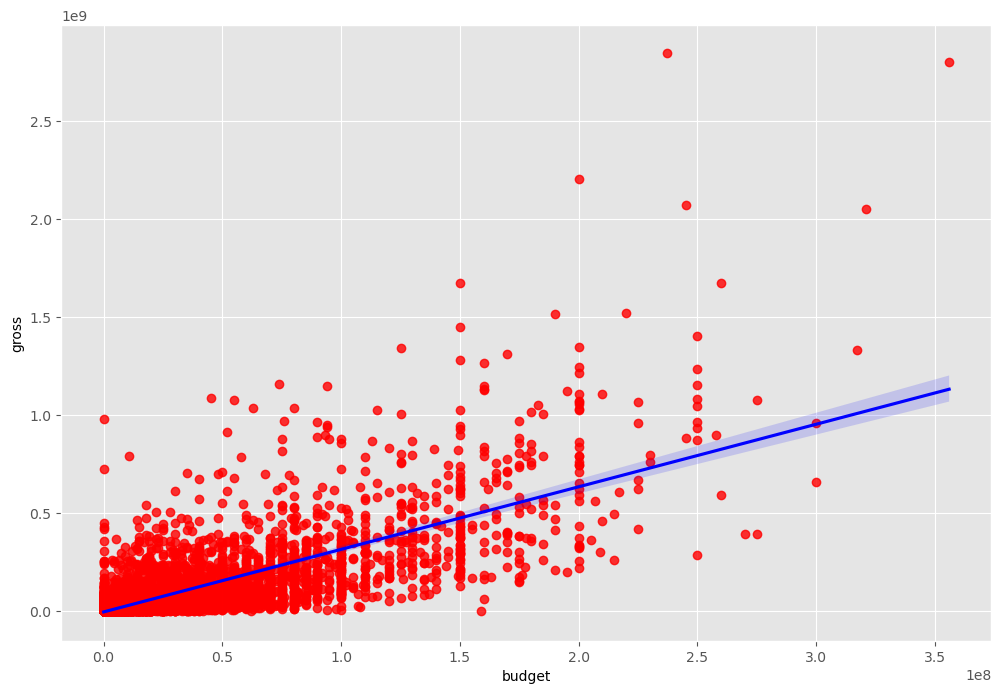

In [18]:
#plot gross vs budget using seaborn

sns.regplot(x = 'budget' , y = 'gross' , data = df , scatter_kws= {'color' : 'red'} , line_kws = {'color' : 'blue'})

In [19]:
df.corr() #dff= pearson and there is kendall and spearman
#high Correlation between budget and gross

C:\Users\ajhgs\AppData\Local\Temp\ipykernel_15928\847250271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #dff= pearson and there is kendall and spearman


,score,votes,budget,gross,runtime
score,1.000000,1.000000,0.268372,0.244339,1.000000
votes,1.000000,1.000000,0.268372,0.244339,1.000000
budget,0.268372,0.268372,1.000000,0.750157,0.268372
gross,0.244339,0.244339,0.750157,1.000000,0.244339
runtime,1.000000,1.000000,0.268372,0.244339,1.000000


In [20]:
Correlation_matrix = df.corr()

C:\Users\ajhgs\AppData\Local\Temp\ipykernel_15928\2927545042.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = df.corr()


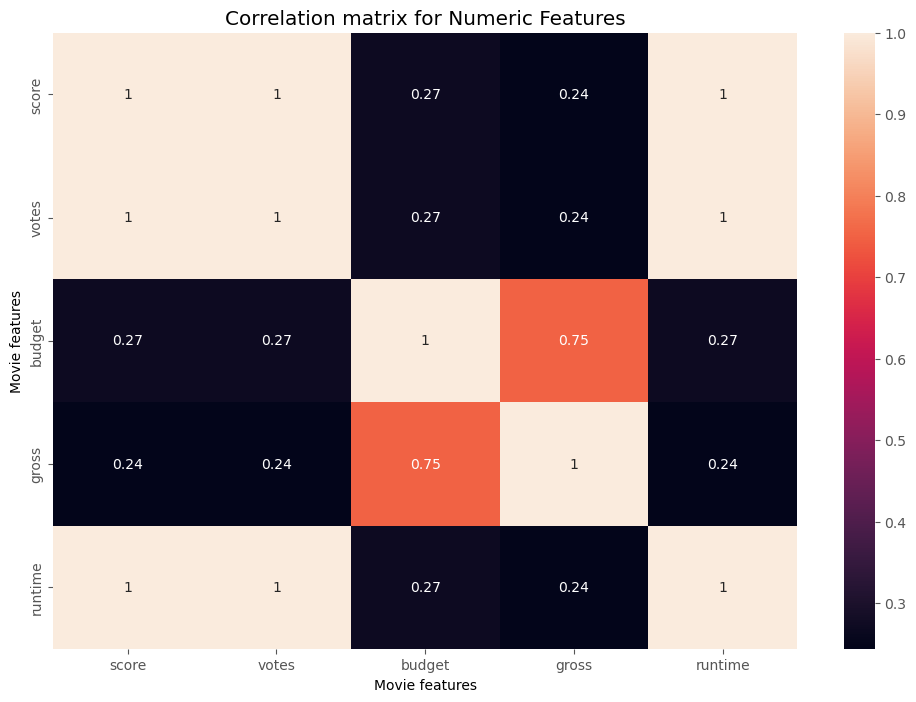

In [22]:
sns.heatmap(Correlation_matrix , annot = True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [23]:
#look at the company 
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",162,162,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",181,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019 (United States),2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",194,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",138,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",149,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018 (United States),2018


In [25]:
df_numerized = df

In [29]:
for col_name in df_numerized.columns :
    if (df_numerized[col_name].dtype == 'object') :
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
5445,Avatar,6,0,697,162,162,1155,1779,2335,56,237000000,2847246203,2254,162,335,29
7445,Avengers: Endgame,6,0,184,181,181,162,744,2242,56,356000000,2797501328,1607,181,520,39
3045,Titanic,6,6,705,194,194,1155,1779,1596,56,200000000,2201647264,2254,194,146,17
6663,Star Wars: Episode VII - The Force Awakens,6,0,699,138,138,1125,2551,525,56,245000000,2069521700,1541,138,459,35
7244,Avengers: Infinity War,6,0,193,149,149,162,744,2242,56,321000000,2048359754,1607,149,504,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,7,5,1278,92,92,117,83,2798,56,0,0,1160,92,89,10
1614,Edge of Sanity,7,10,56,85,85,1033,1744,167,55,0,0,147,85,79,9
1606,"I, Madman",7,8,258,89,89,2743,947,1196,7,0,0,2238,89,79,9
1601,My Twentieth Century,0,4,1161,104,104,1105,1697,682,19,0,0,505,104,84,10


In [45]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,tmp,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",162,162,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",181,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019 (United States),2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",194,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",138,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",149,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018 (United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,"January 26, 1990 (United States)",92,92,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990 (United States),1990
1614,Edge of Sanity,R,Horror,"April 14, 1989 (United States)",85,85,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989 (United States),1989
1606,"I, Madman",R,Fantasy,"April 7, 1989 (United States)",89,89,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989 (United States),1989
1601,My Twentieth Century,0,Comedy,"January 13, 1990 (Japan)",104,104,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990 (Japan),1990


C:\Users\ajhgs\AppData\Local\Temp\ipykernel_15928\2147798979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = df_numerized.corr()


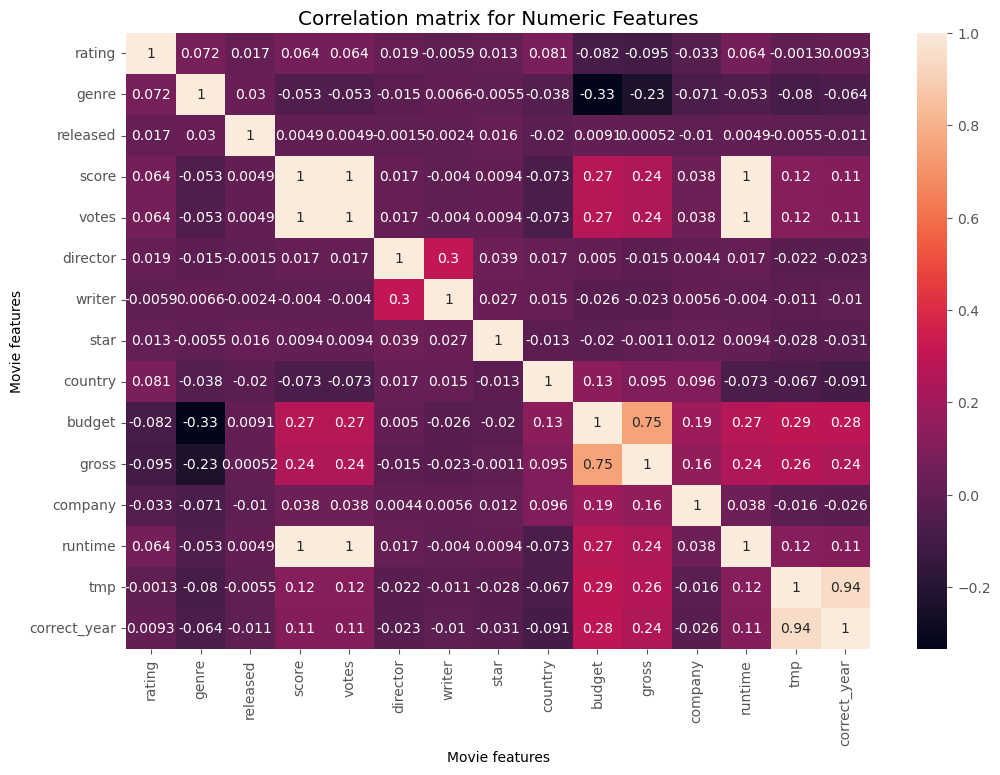

In [46]:
Correlation_matrix = df_numerized.corr()

sns.heatmap(Correlation_matrix , annot = True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [48]:
Correlation_mat = df_numerized.corr()

C:\Users\ajhgs\AppData\Local\Temp\ipykernel_15928\3088986436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_mat = df_numerized.corr()


In [49]:
corr_pairs = Correlation_mat.unstack()
corr_pairs

rating        rating          1.000000
              genre           0.072423
              released        0.016613
              score           0.064133
              votes           0.064133
                                ...   
correct_year  gross           0.243478
              company        -0.026492
              runtime         0.109567
              tmp             0.944242
              correct_year    1.000000
Length: 225, dtype: float64

In [55]:
sort_pairs = corr_pairs.sort_values()

sort_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
              rating         -0.095450
                                ...   
              gross           1.000000
company       company         1.000000
runtime       score           1.000000
              runtime         1.000000
correct_year  correct_year    1.000000
Length: 225, dtype: float64

In [56]:
high_corr = sort_pairs [(sort_pairs) > 0.5]

high_corr

gross         budget          0.750157
budget        gross           0.750157
tmp           correct_year    0.944242
correct_year  tmp             0.944242
tmp           tmp             1.000000
rating        rating          1.000000
star          star            1.000000
runtime       votes           1.000000
genre         genre           1.000000
released      released        1.000000
score         score           1.000000
              votes           1.000000
              runtime         1.000000
votes         score           1.000000
              votes           1.000000
              runtime         1.000000
director      director        1.000000
writer        writer          1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       score           1.000000
              runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64